# Assignment 3
### Due 9/23. Do four of five.

### Completed By William Brannock
### Computing ID: svv8fs@virginia.edu

In [3]:
# Downloading data to directory
def download_data(force=False):
    """Download and extract course data from Zenodo."""
    import urllib.request, zipfile, os
    
    zip_path = 'data.zip'
    data_dir = 'data'
    
    if not os.path.exists(zip_path) or force:
        print("Downloading course data")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/16954427/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")
    else:
        print("Download file already exists")
        
    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")
    else:
        print("Data directory already exists")

download_data()

Download file already exists
Data directory already exists


1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

### Q1 Write-Up

The two columns I selected were RacehispanicOrigin and EducationLevelAdults20. The race column is self-explanatory and the EducationLevelAdults20 corresponds to the education level of the survey respondant or their spouse. When doing the missing data analysis, I noticed that RacehispanicOrigin was one of the few columns that had no missing data. That makes sense as evaluating race disparities is common in health research, so extra care was probably taken to make sure that was collected. The EducationLevelAdults20 column had about 37% of entries missing.

Looking at the contingency table, we see some racial disparities in educational attainment. The Mexican American category had the highest proportion of household whose adults over age 20 who reported only having a less than a 9th grade education. The Other Race category had the highest proportion of the population whose household's adults who reported having a college education or higher. 


As someone who worked with similar datasets in my job before starting this program, I found the Other Race category having the highest educational attainments suprising at first look. However, upon reflection I think it could be due to it having groups like Asian Americans contained within it. One other thing to note here is that we can only analyze the datapoints we have and have to assume the missing data follows a similar distribution. In this case, I expect it probably would. 



In [29]:
# Import useful libaries
import pandas as pd
import seaborn as sns
import numpy as np

# Open NHANES dataset
nhanes = pd.read_csv("./data/nhanes_data_17_18.csv")
nhanes.head(5)

/var/folders/2n/rqnjq39x0bl3l55y0ghnzcz00000gn/T/ipykernel_47974/2421049931.py:7: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv("./data/nhanes_data_17_18.csv")


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Look at missing values for RacehispanicOrigin
nhanes['RacehispanicOrigin'].value_counts(dropna=False)

RacehispanicOrigin
Non-Hispanic White                     2792
Non-Hispanic Black                     1949
Other Race - Including Multi-Racial    1658
Mexican American                       1229
Other Hispanic                          738
Name: count, dtype: int64

In [31]:
# Look at missing values for EducationLevelAdults20
nhanes['EducationLevelAdults20'].value_counts(dropna=False)

EducationLevelAdults20
NaN                                                   3103
Some college or AA degree                             1689
College graduate or above                             1261
High school graduate/GED or equivalent                1251
9-11th grade (Includes 12th grade with no diploma)     598
Less than 9th grade                                    454
Don't Know                                              10
Name: count, dtype: int64

In [32]:
# Check percentage of missing data for EducationLevelAdults20
nhanes['EducationLevelAdults20_NA'] = nhanes['EducationLevelAdults20'].isna() 
nhanes['EducationLevelAdults20_NA'].value_counts(normalize=True)

EducationLevelAdults20_NA
False    0.629094
True     0.370906
Name: proportion, dtype: float64

In [42]:
# Filter dataframe to applicable columns and drop missing values
filtered = nhanes[['RacehispanicOrigin', 'EducationLevelAdults20']].dropna()

# Compute Contingency table using Pandas
pd.crosstab(filtered['EducationLevelAdults20'],filtered['RacehispanicOrigin'],  normalize='columns' )

RacehispanicOrigin,Mexican American,Non-Hispanic Black,Non-Hispanic White,Other Hispanic,Other Race - Including Multi-Racial
EducationLevelAdults20,,,,,
9-11th grade (Includes 12th grade with no diploma),0.183381,0.122680,0.095185,0.133065,0.078201
College graduate or above,0.071633,0.191283,0.231876,0.159274,0.465298
Don't Know,0.002865,0.001614,0.000553,0.008065,0.000978
High school graduate/GED or equivalent,0.224928,0.263923,0.283896,0.181452,0.160313
Less than 9th grade,0.280802,0.027441,0.024350,0.241935,0.058651
Some college or AA degree,0.236390,0.393059,0.364139,0.276210,0.236559


2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

### Q2 Write-Up

The categorical variable I chose to look at was HowOftenFeelOverlySleepyDuringDay and the numerical variable I chose was SleepHoursWeekdaysOrWorkdays. My idea here was to check my hypothesis that people who sleep less hours will report feeling tired more often. Both variables here had about 30% missing data and were dropped before I completed the analysis. 

When you look at the table and plots, you can indeed see that the people who report being sleepy more often do have lower mean times sleep times on average. The KDE plot is particulary helpful here because you can see the "Almost Always Feel Sleepy" group has a lot more mass in the 2-6 hour range than the other groups. You can also see that the 'Often Feels Sleepy' group also has more mass there, just not quite as much. I think that makes a lot of sense intuitively and helps support my theory. 

In [48]:

#Look at missing values for HowOftenFeelOverlySleepyDuringDay
nhanes['HowOftenFeelOverlySleepyDuringDay'].value_counts(dropna=False)


HowOftenFeelOverlySleepyDuringDay
NaN                                    2550
Sometimes - 2-4 times a month          1950
Rarely - 1 time a month                1379
Often- 5-15 times a month              1019
Never                                   967
Almost always - 16-30 times a month     501
Name: count, dtype: int64

In [ ]:
# Look at percent of missing values for HowOftenFeelOverlySleepyDuringDay
nhanes['HowOftenFeelOverlySleepyDuringDay'].isnull().mean()

np.float64(0.3048051637580684)

In [ ]:
# Look at percent of missing values for SleepHoursWeekdaysOrWorkdays
nhanes['SleepHoursWeekdaysOrWorkdays'].isnull().mean()

np.float64(0.3087497011714081)

In [52]:
# Create descriptive table using pandas groupby and describe methods
filtered2 = nhanes[['SleepHoursWeekdaysOrWorkdays', 'HowOftenFeelOverlySleepyDuringDay']].dropna()
conditional = 'HowOftenFeelOverlySleepyDuringDay'
filtered2.loc[:,['SleepHoursWeekdaysOrWorkdays', conditional]].groupby(conditional)['SleepHoursWeekdaysOrWorkdays'].describe().sort_values('mean')


,count,mean,std,min,25%,50%,75%,max
HowOftenFeelOverlySleepyDuringDay,,,,,,,,
Almost always - 16-30 times a month,489.0,7.347648,2.041024,2.0,6.0,7.5,8.5,14.0
Often- 5-15 times a month,1014.0,7.517751,1.799742,2.0,6.5,7.5,8.5,14.0
Sometimes - 2-4 times a month,1934.0,7.665977,1.560592,2.0,7.0,8.0,8.5,14.0
Rarely - 1 time a month,1376.0,7.699128,1.558073,2.0,7.0,8.0,9.0,14.0
Never,961.0,7.792924,1.663265,2.0,7.0,8.0,9.0,14.0


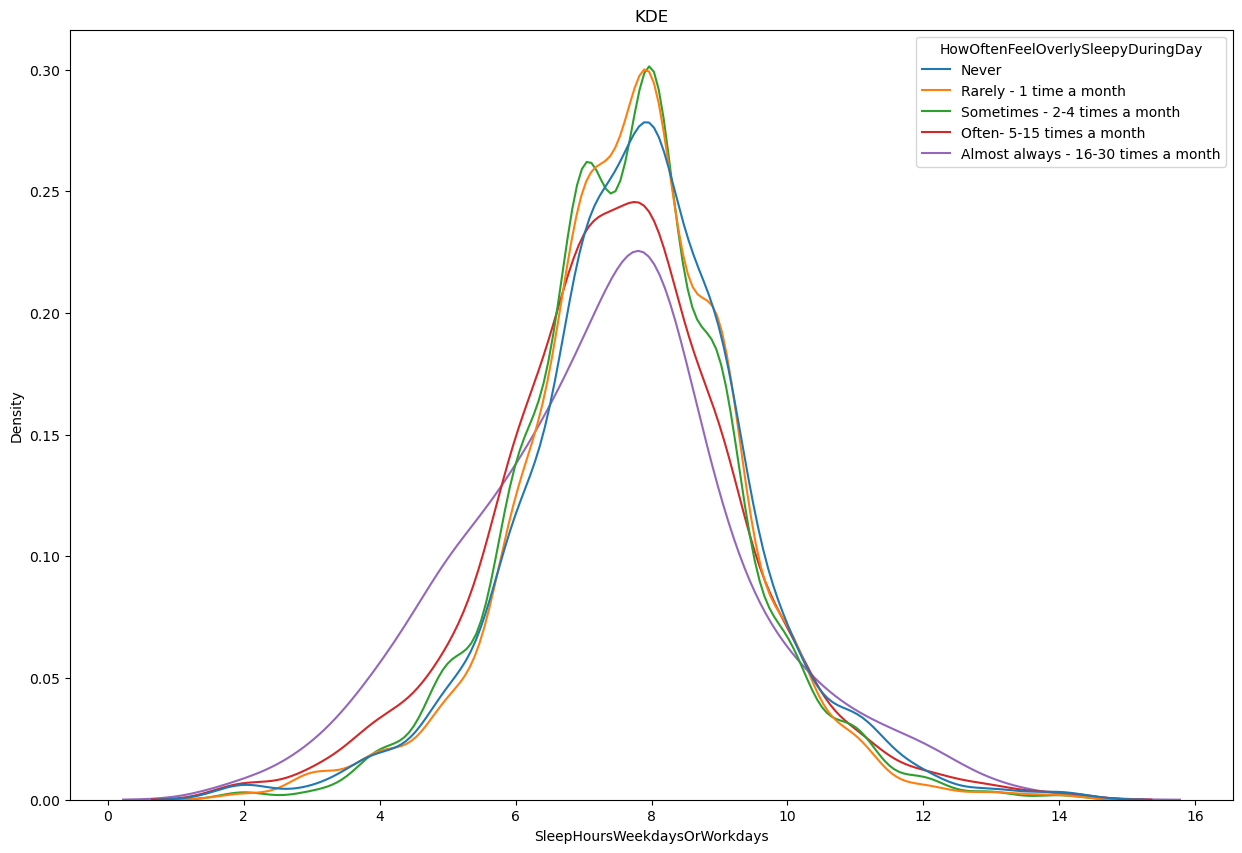

In [53]:
import matplotlib.pyplot as plt
# Had to change this plotsize to get it make sure legend fit
plt.figure(figsize=(15,10))

#Create KDE plot
sns.kdeplot( data=filtered2, x='SleepHoursWeekdaysOrWorkdays', hue=conditional, common_norm=False ).set(title='KDE')

plt.show()

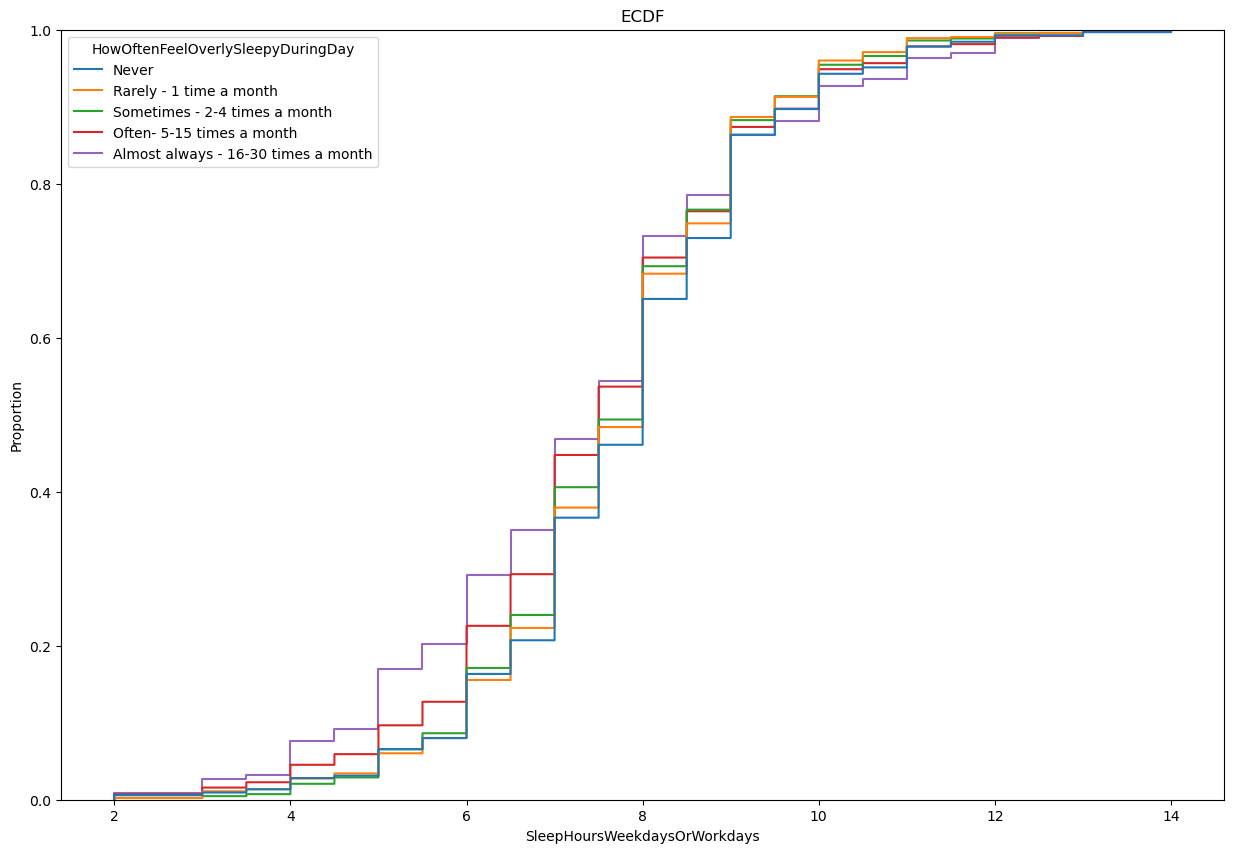

In [54]:
# Plot ECDF curves as well for good measure
plt.figure(figsize=(15,10))
sns.ecdfplot( data=filtered2, x='SleepHoursWeekdaysOrWorkdays', hue=conditional).set(title='ECDF')
plt.show()

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

I elected to skip this question.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

### Question 4 Write-Up
For this question, I chose to look at the Tumor Size and Overall Survival (In Months) variables from the Metabric dataset. Looking at the plot here, it looks like most of the tumor sizes are in the 12-35 range. Over that section, you can see a clear negative relationship between the size of the tumor and the surival months. This makes sense to me as you would expect people with larger tumors to be at more acute risk of death. However, when we get to the part of the dataset that less less data, you can see the LCLS estimator overfitting based on the few datapoints out there. As a result, the estimator is less useful there. 

In [55]:
# Calculate Silverman plug in estimate for bandwith
def calculate_silverman(x):
    x = x.to_numpy()
    iqr = np.quantile(x, .75) - np.quantile(x, .25)
    h = 0.9* min(np.std(x), iqr/1.34) * len(x)** (-0.2)
    return h

# Calculate LCLS Estimator
def calculate_lcls(x,y,h=None):
    grid = np.sort(x.unique())

    if h is None:
        h = calculate_silverman(x)

    # Compute the Kernal (Went with Gaussian)
    I = -(x.to_numpy().reshape(-1,1) - grid.reshape(1,-1))**2
    K = np.exp(I/(2*h**2)) / (np.sqrt(2*np.pi)*h)

    # Calculate the LCLS Estimator
    numerator = y@K
    denominator = K.sum(axis=0)
    y_hat = numerator/denominator
    return y_hat, grid

# Plot Function (calls lcls function internally)
def plot_lcls(x,y,h=None):
    y_hat, grid = calculate_lcls(x,y,h)
    sns.scatterplot(x=x, y=y, alpha=0.4, color='orange')
    sns.lineplot(x=grid, y=y_hat, color='navy')
    plt.show()

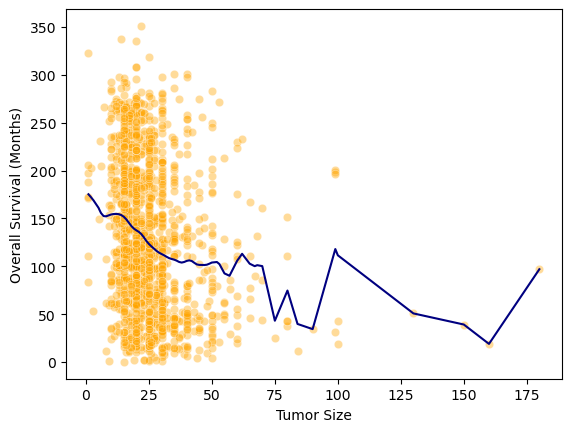

In [ ]:
# Load in metabric dataset
metabric = pd.read_csv("./data/metabric.csv")

# Plot LCLS of Tumor Size vs Overall Survival (Months)
plot_lcls(metabric['Tumor Size'], metabric['Overall Survival (Months)'])


5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

### Question 5 Write-Up
For this question, I decided to look at the Garage.Cars variable and the price variable from the Ames dataset.
For 0-3 Car Garages, we see that, on average, price increased as Garage Size increased. However, interestingly enough, here for 4 and 5 Garage Cars we see the price trend downward. This could be due to the limited sample size for those two sizes. 


 Like our class example, there is likely some omitted variables here that could be threats to causal indentification. For example, a larger garage size is likely correlated with a larger overall house. And we know a larger overall house size will be correlated with a higher price. Additionally, I would suspect that houses with larger garage capacities are also newer than other houses and we know that newer houses probably also cost more on average. 

Despite these possible threats to casual identification, we can still use this model to predict Price given Garage Size as long as we don't intervene in the system to change the outcome. This is because prediction and casual inference are fundamentally different things. In prediction, we are just looking for an expected value Y given we have seen a certain value for x. We are not making claims about what would happen to Y if we intervene and changed x. 

,price
Garage.Cars,
0.0,104949.254777
1.0,127267.422879
2.0,183562.102932
3.0,310304.622995
4.0,228748.687500
5.0,126500.000000


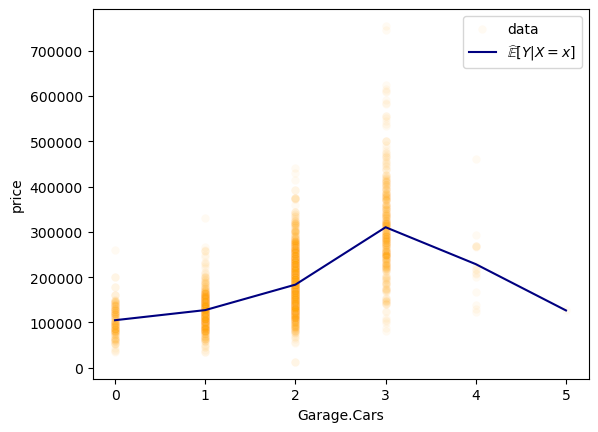

In [72]:
ames = pd.read_csv("./data/ames_prices.csv")
# Drop missing values and calculate means for each garage size
means = ames[['price','Garage.Cars']].dropna().groupby('Garage.Cars').mean()

# Plot scatterplot and CEF
sns.scatterplot(data=ames, y='price', x='Garage.Cars',alpha=.05, label='data', color='orange')
sns.lineplot(data=means, x='Garage.Cars',y='price',color='navy', label='$\\widehat{\\mathbb{E}}[Y|X=x]$')

# output means table
means